# Exercise of XGBoost (Extreme Gradient Boost)
This notebook is based on DataCamp's website: https://www.datacamp.com/community/tutorials/xgboost-in-python

In [1]:
import sklearn
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
data = pd.DataFrame(boston.data)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data.columns = boston.feature_names

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
data['PRICE'] = boston.target

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [15]:
data.shape

(506, 14)

In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Define DMatrix (Optimized Data Structure)

In [17]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [18]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
data_matrix = xgb.DMatrix(data=X.values, label=y.values)

In [20]:
type(data_matrix)

xgboost.core.DMatrix

# Split Dataset into Train/Test Datasets

In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [23]:
X_train.shape

(404, 13)

In [24]:
X_test.shape

(102, 13)

# Create Regressor (Solver)

In [25]:
objective = 'reg:squarederror'
# objective = 'reg:linear'

learning_rate = 0.1

colsample_bytree = 0.3 # percentage of features used per tree. High value can lead to overfitting.
max_depth = 5  # determines how deeply each tree is allowed to grow during any boost ROUND.
alpha = 10 # L1 regularization on leaf weights. A larger value leads to more regularization.
n_estimator = 10 # number of trees you want to build.

xg_reg = xgb.XGBRegressor(objective=objective,
                            colsample_bytree=colsample_bytree,
                            learning_rate=learning_rate,
                            max_depth=max_depth,
                            alpha=alpha,
                            n_estimator=n_estimator)

In [26]:
type(xg_reg)

xgboost.sklearn.XGBRegressor

# Train

In [27]:
xg_reg.fit(X_train, y_train)

/home/ec2-user/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimator=10,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

# Prediction and RMS Error

In [28]:
preds = xg_reg.predict(X_test)

In [29]:
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, preds))

In [30]:
print('RMSE: {}'.format(rmse))

RMSE: 3.851545783180026


# K-fold Cross Validation
- Not split the dataset into train/test. 
    - The whole dataset is used for both training and validation.
    
- Each entry is used for validation just once.

In [31]:
data_matrix = xgb.DMatrix(data=X.values, label=y.values)

In [32]:
params = {'objective': 'reg:squarederror',
         'colsample_bytree': colsample_bytree,
         'learning_rate': learning_rate,
         'max_depth': max_depth,
         'alpha': alpha}

cv_results = xgb.cv(dtrain=data_matrix,
                   params=params,
                   nfold=3,
                   num_boost_round=50,
                   early_stopping_rounds=10,
                   metrics='rmse',
                   as_pandas=True,
                   seed=123)

In [33]:
cv_results.shape

(50, 4)

In [34]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


In [35]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,2.367925,0.109945,4.028212,0.410623
46,2.333494,0.109729,4.008792,0.426057
47,2.312211,0.110639,3.998730,0.431785
48,2.290414,0.113872,3.987814,0.427569
49,2.266126,0.105188,3.975679,0.419003


In [36]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.975679
Name: test-rmse-mean, dtype: float64


# Visualize Boosting Trees and Feature Importance

```pip install graphviz``` on cmd. You may also need to run ```sudo apt-get install graphviz```

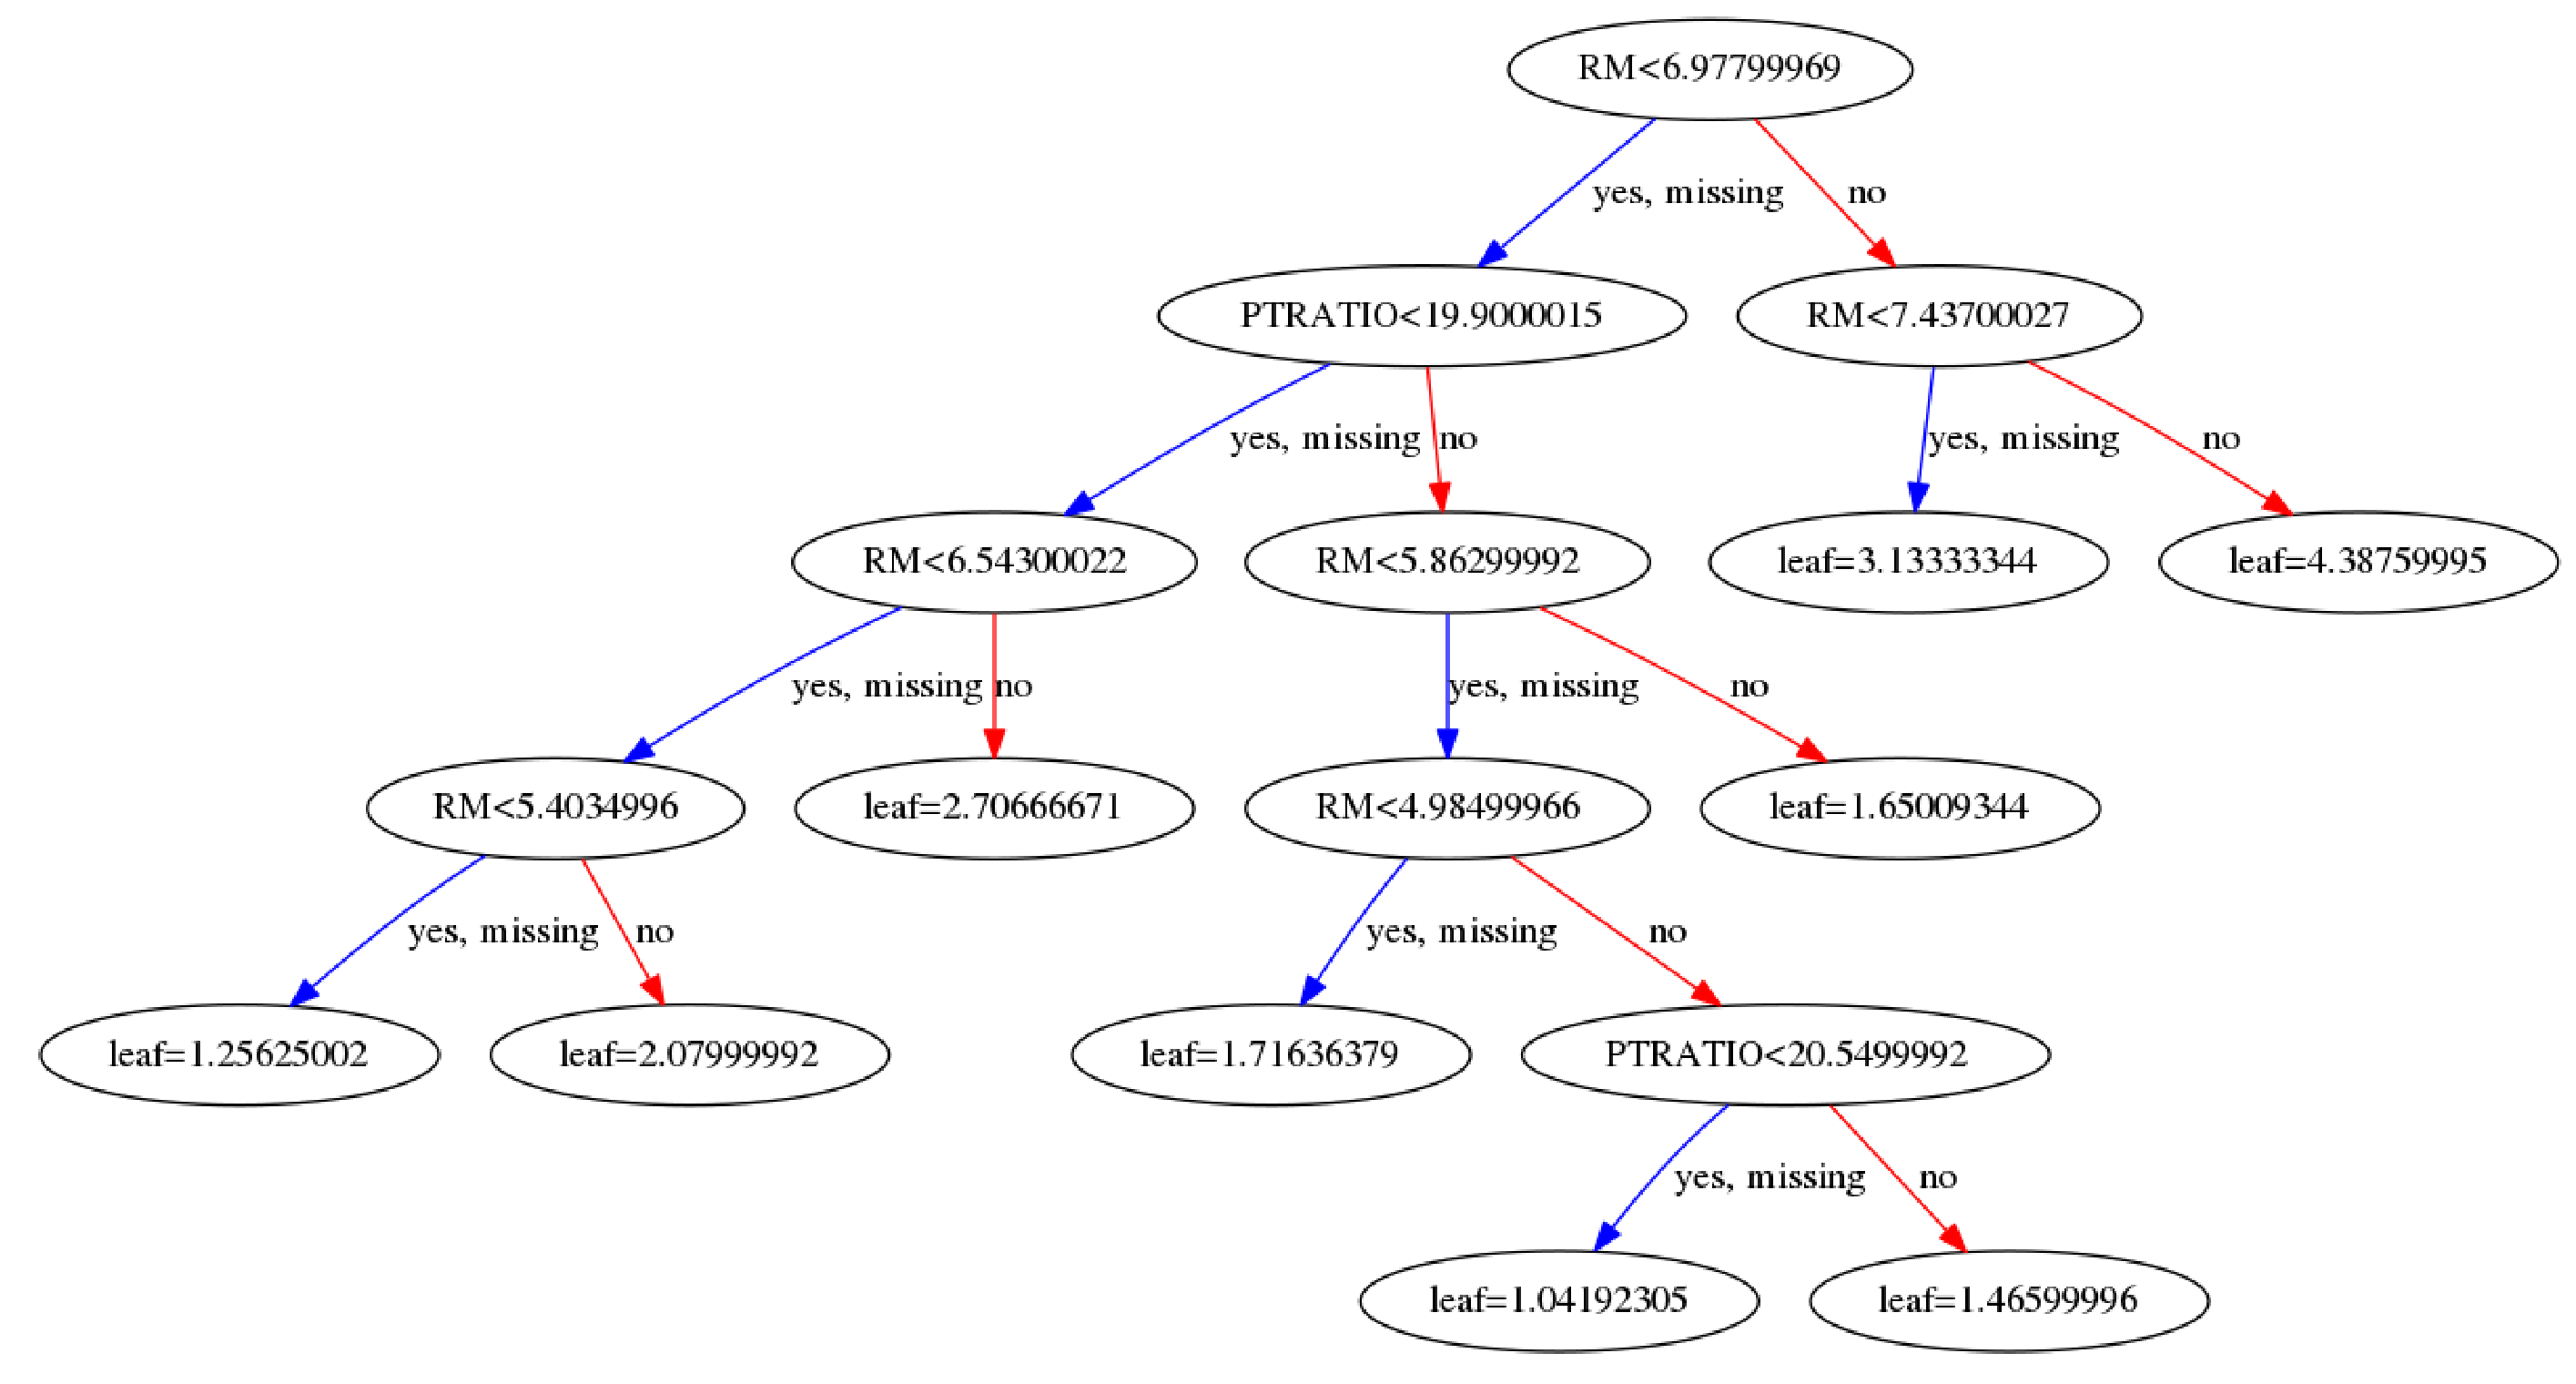

In [48]:
# Need to install GraphViz
# $ apt install graphviz
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

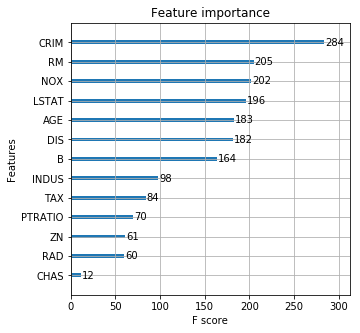

In [51]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()